# 目标检测和边界框

```{note}
之前我们介绍了各种图像分类模型，但有时候我们不仅想知道图像的类别，还想知道物体在图像中的具体位置，这类任务被称为目标检测<br/>
在目标检测中，我们常用边界框（bounding box）来描述对象的位置
```

## 目标检测

通过一个例子来进行说明。

下面的示例图片中，左边是一只狗，右边是一只猫，我们希望目标检测不仅能检测出它们，并且能标明出它们的位置。

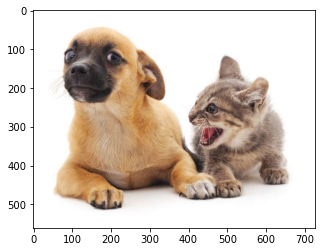

In [1]:
import matplotlib.pyplot as plt

img = plt.imread("images/e/catdog.jpg")
plt.imshow(img)

## 边界框

我们使用边界框即一个矩形来标明物体的位置。

它可以用（左上坐标，右下坐标）来表示，也可以用（中间坐标，宽度，高度）来表示，我们默认使用前者。

In [2]:
# [xmin, ymin, xmax, ymax]
dog_bbox, cat_bbox = [60.0, 45.0, 378.0, 516.0], [400.0, 112.0, 655.0, 493.0]

```{note}
在目标检测中左上才是(0,0)
```

In [3]:
#@save
def bbox_to_rect(bbox, color):
    """
    将边界框的(左上x, 左上y, 右下x, 右下y)格式转换成matplotlib的((左上x, 左上y), 宽, 高)格式
    """
    return plt.Rectangle(xy=(bbox[0], bbox[1]),
                         width=bbox[2]-bbox[0], height=bbox[3]-bbox[1],
                         fill=False, edgecolor=color, linewidth=2)

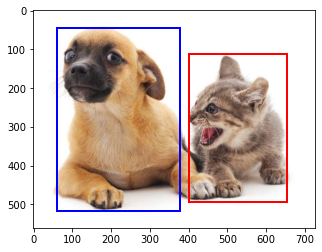

In [4]:
fig = plt.imshow(img)
# 展示目标的边界框
fig.axes.add_patch(bbox_to_rect(dog_bbox, 'blue'))
fig.axes.add_patch(bbox_to_rect(cat_bbox, 'red'))

## 锚框

目标检测算法通常会在输入图像中采集大量的区域，然后判断这些区域中是否包含我们感兴趣的目标，并调整区域从而更准确的预测目标的真实边界框（ground-truth bounding box）。

这些区域被称为锚框，比如说我们可以以每个像素为中心生成多个大小和宽高比不同的边界框作为锚框。

假设输入图像高为 $h$，宽为 $w$，那么比例为 $s\in(0, 1]$、宽高比为 $r>0$ 的锚框的宽度和高度分别为 $ws\sqrt{r}$ 和 $hs/\sqrt{r}$。

要设置不同形状的锚框，我们可以设置一系列比例 $s_{1},...,s_{n}$ 和一系列宽高比 $r_{1},...,r_{m}$。

考虑所有的组合时锚框的数量会过多，在时间中，我们只考虑包含 $s_{1}$ 和 $r_{1}$ 的组合：

$$(s_{1},r_{1}),...,(s_{1},r_{m}),(s_{2}, r_{1}),...,(s_{n}, r_{1})$$

下图展示了以 (250, 250) 为中心的锚框。

![jupyter](../images/e/output_anchor.svg)